<a href="https://colab.research.google.com/github/jaishreejoshita/Python_Projects/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading dataset

df = pd.read_csv('/content/titanic.csv')

In [4]:
#Examining the data
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

print(df.head())

   Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare embarked  \
0           0         0       3    male  22.0      1      0   7.2500        S   
1           1         1       1  female  38.0      1      0  71.2833        C   
2           2         1       3  female  26.0      0      0   7.9250        S   
3           3         1       1  female  35.0      1      0  53.1000        S   
4           4         0       3    male  35.0      0      0   8.0500        S   

   class    who  adult_male deck  embark_town alive  alone  
0  Third    man        True  NaN  Southampton    no  False  
1  First  woman       False    C    Cherbourg   yes  False  
2  Third  woman       False  NaN  Southampton   yes   True  
3  First  woman       False    C  Southampton   yes  False  
4  Third    man        True  NaN  Southampton    no   True  


In [5]:
print(df.tail())

     Unnamed: 0  survived  pclass     sex   age  sibsp  parch   fare embarked  \
886         886         0       2    male  27.0      0      0  13.00        S   
887         887         1       1  female  19.0      0      0  30.00        S   
888         888         0       3  female   NaN      1      2  23.45        S   
889         889         1       1    male  26.0      0      0  30.00        C   
890         890         0       3    male  32.0      0      0   7.75        Q   

      class    who  adult_male deck  embark_town alive  alone  
886  Second    man        True  NaN  Southampton    no   True  
887   First  woman       False    B  Southampton   yes   True  
888   Third  woman       False  NaN  Southampton    no  False  
889   First    man        True    C    Cherbourg   yes   True  
890   Third    man        True  NaN   Queenstown    no   True  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB
None


In [7]:
print(df.shape)

(891, 16)


In [8]:
print(df.columns)

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [9]:
#uncover the diversity within each column
unique_counts = df.nunique() #count the unique value in each column
print(unique_counts)

Unnamed: 0     891
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


In [10]:
survived_unique_values = df['survived'].unique() #count the unique values in the survived column
print(survived_unique_values)
print(f"The unique values in the survived column are: {survived_unique_values}")


[0 1]
The unique values in the survived column are: [0 1]


In [11]:
sex_unique_values = df['sex'].unique()
print(sex_unique_values)
print(f"The unique values in the sex column are: {sex_unique_values}")

['male' 'female']
The unique values in the sex column are: ['male' 'female']


In [12]:
embark_town_unique_values = df['embark_town'].unique()
print(embark_town_unique_values)
print(f"The unique values in the embark_town column are: {embark_town_unique_values}")

['Southampton' 'Cherbourg' 'Queenstown' nan]
The unique values in the embark_town column are: ['Southampton' 'Cherbourg' 'Queenstown' nan]


In [13]:
#value_counts() function

gender_value_counts = df['sex'].value_counts() #count the occurance of each unique value in sex column
print(gender_value_counts)

survived_value_counts = df['survived'].value_counts()
print(survived_value_counts)


sex
male      577
female    314
Name: count, dtype: int64
survived
0    549
1    342
Name: count, dtype: int64


In [14]:
#groupby() function
#to separate the passanger based on gender and then count how many of them has survived

grouped_data = df.groupby(['sex','survived'])['survived'].count()
print(grouped_data)

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64


In [15]:
#survival by passanger class

class_survived_counts = df.groupby(['pclass', 'survived'])['survived'].count()
print(class_survived_counts)

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64


In [16]:
class_sex_survived_counts = df.groupby(['pclass','sex','survived'])['survived'].count()
print(class_sex_survived_counts)

pclass  sex     survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: survived, dtype: int64


In [17]:
embarked_class_sex_survived_counts = df.groupby(['embark_town','pclass', 'sex','survived'])['survived'].count()
print(embarked_class_sex_survived_counts)

embark_town  pclass  sex     survived
Cherbourg    1       female  0             1
                             1            42
                     male    0            25
                             1            17
             2       female  1             7
                     male    0             8
                             1             2
             3       female  0             8
                             1            15
                     male    0            33
                             1            10
Queenstown   1       female  1             1
                     male    0             1
             2       female  1             2
                     male    0             1
             3       female  0             9
                             1            24
                     male    0            36
                             1             3
Southampton  1       female  0             2
                             1            46
                 

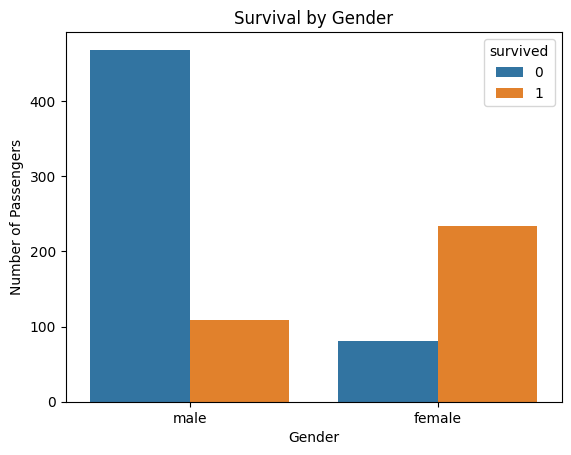

In [18]:
#Visualisation using seaborn

#life to data by seaborn's countplot

sns.countplot(x='sex', hue='survived', data=df)
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Survival by Gender')
plt.show()


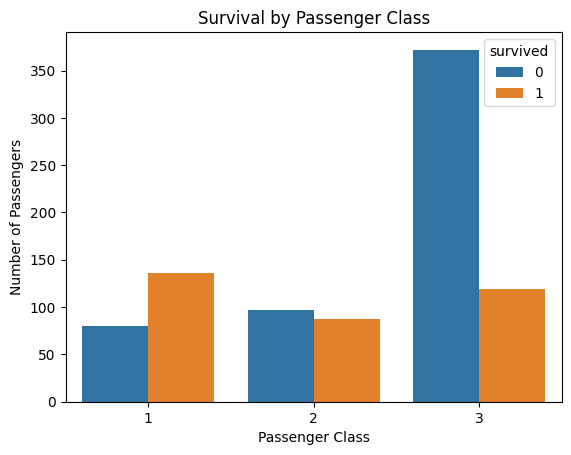

In [19]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Survival by Passenger Class')
plt.show()

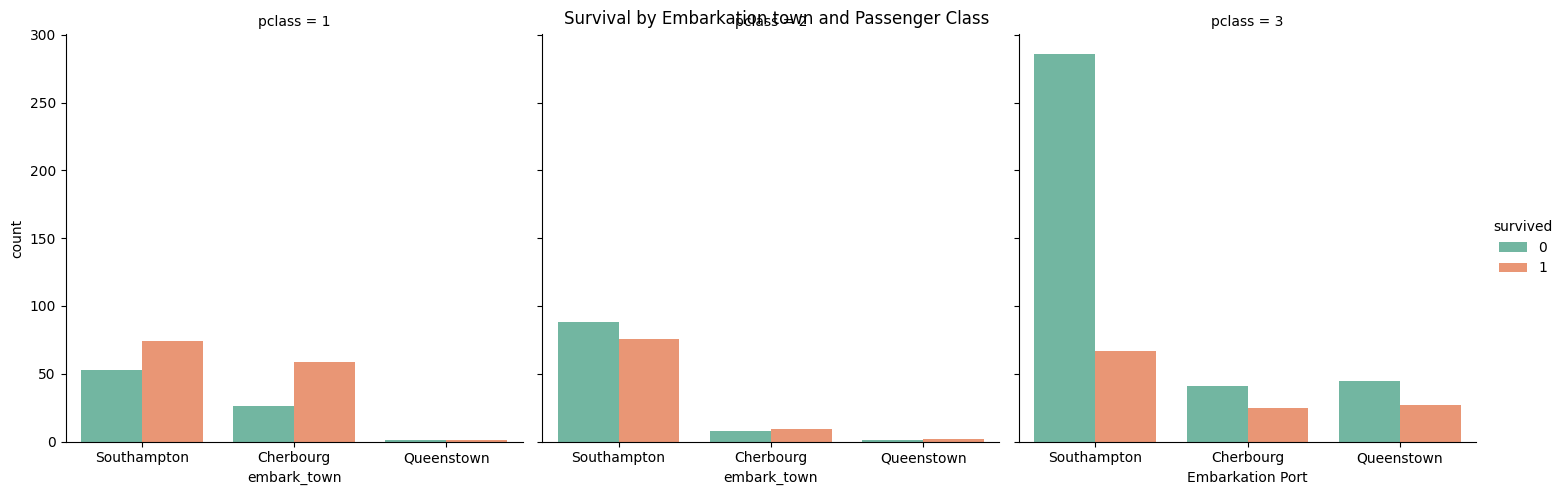

In [20]:
#Embarkation port, class and survival using catplot
#plotting with catplot
sns.catplot(x='embark_town', hue='survived', col='pclass',data=df, kind='count',palette='Set2')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.suptitle('Survival by Embarkation town and Passenger Class')
plt.show()

In [21]:
#Describe Function
#Describe() used to generate a table that summaizes key statistical info about numerical variables
#It included details such as count of observations, mean values, SD, and max value, quartile values

print(df.describe())

       Unnamed: 0    survived      pclass         age       sibsp       parch  \
count  891.000000  891.000000  891.000000  714.000000  891.000000  891.000000   
mean   445.000000    0.383838    2.308642   29.699118    0.523008    0.381594   
std    257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   
min      0.000000    0.000000    1.000000    0.420000    0.000000    0.000000   
25%    222.500000    0.000000    2.000000   20.125000    0.000000    0.000000   
50%    445.000000    0.000000    3.000000   28.000000    0.000000    0.000000   
75%    667.500000    1.000000    3.000000   38.000000    1.000000    0.000000   
max    890.000000    1.000000    3.000000   80.000000    8.000000    6.000000   

             fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


In [22]:
#information about the descriptive parts
print(df['embark_town'].describe())

count             889
unique              3
top       Southampton
freq              644
Name: embark_town, dtype: object


In [23]:
#Dropping columns come into play for reduntant columns containing same info.
#survive and alive is same.

print(df['survived'].value_counts())
print(df['alive'].value_counts())

survived
0    549
1    342
Name: count, dtype: int64
alive
no     549
yes    342
Name: count, dtype: int64


In [24]:
df.drop(columns=['alive'], inplace=True)
print(df.columns)

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alone'],
      dtype='object')


In [25]:
#remove similar columns

df.drop(columns=['embarked','class'], inplace=True)

In [26]:
print(df.columns)

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'who', 'adult_male', 'deck', 'embark_town', 'alone'],
      dtype='object')


In [27]:
#Important Data Manipulation technique : Data cleaning and Transformation
#Input missing values, encoding categorical variables, etc to improve data quality for analysis

#Lets frst understanf the value count of adult_male column
print(df['adult_male'].value_counts())

adult_male
True     537
False    354
Name: count, dtype: int64


In [28]:
#replace() function
#df['column_name'].replace({old_value:new_value},inplace=True)

df['adult_male'].replace({True:1, False:0}, inplace=True)
print(df['adult_male'].value_counts())

adult_male
1    537
0    354
Name: count, dtype: int64


<ipython-input-28-64b5adb0103c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['adult_male'].replace({True:1, False:0}, inplace=True)
<ipython-input-28-64b5adb0103c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['adult_male'].replace({True:1, False:0}, inplace=True)


Missing values

In [29]:
#missing values

print(df.isnull().sum())

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64


Several techniques

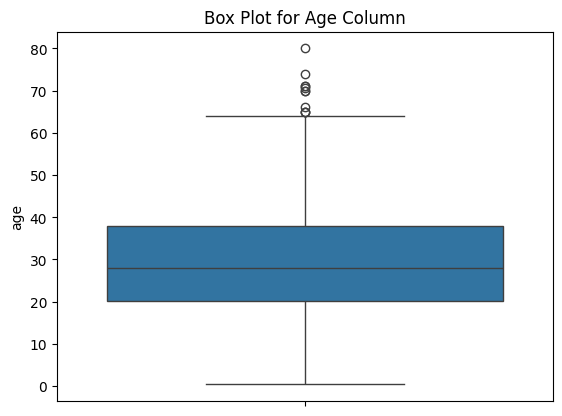

In [31]:
#visualize the data using a boxplot to check if there is any outlier

sns.boxplot(y='age', data=df)
plt.title('Box Plot for Age Column')
plt.show()


In [38]:
#since there is sinificant presence of outlier, so choosing mean imputation would be affected by the outliers
#so, median imputation is a good option as it focuses on the central tendencies of the data, making it less skewed towards the outliers and provides accurately representation of the missing values.

#Let's impute the missing values in the age column with the median

df['age'] = df['age'].fillna(df['age'].median())
print(df.isnull().sum())

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
deck           0
embark_town    0
alone          0
dtype: int64


In [35]:
#Deck column (missing value of 688)
#replace the missing value with most frequent deck value
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
print(df.isnull().sum())

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
deck           0
embark_town    0
alone          0
dtype: int64


In [36]:
#in the embark_town
#its categorical too but with fewer distinct values

#drop rows with missing values in the 'embark_town' column
df.dropna(subset=['embark_town'], inplace=True)
print(df.isnull().sum())

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
deck           0
embark_town    0
alone          0
dtype: int64


In [39]:
#Renaming in our dataset

df.rename(columns={'deck':'cabin'}, inplace=True)
print(df.columns)

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'who', 'adult_male', 'cabin', 'embark_town', 'alone'],
      dtype='object')


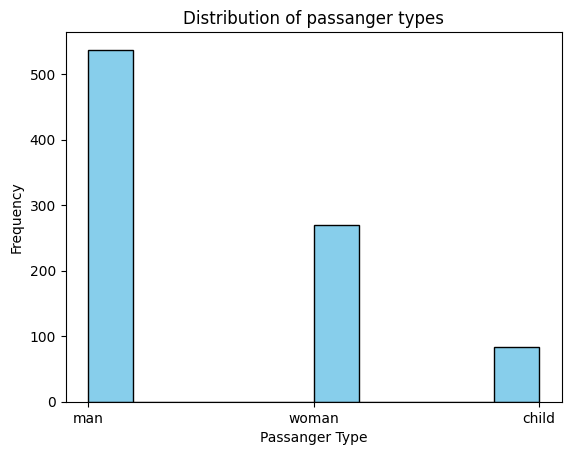

In [41]:
#Histogram for the who column - distribution of type of passanger

plt.hist(df['who'], color='skyblue',edgecolor='black')
plt.xlabel('Passanger Type')
plt.ylabel('Frequency')
plt.title('Distribution of passanger types')
plt.show()

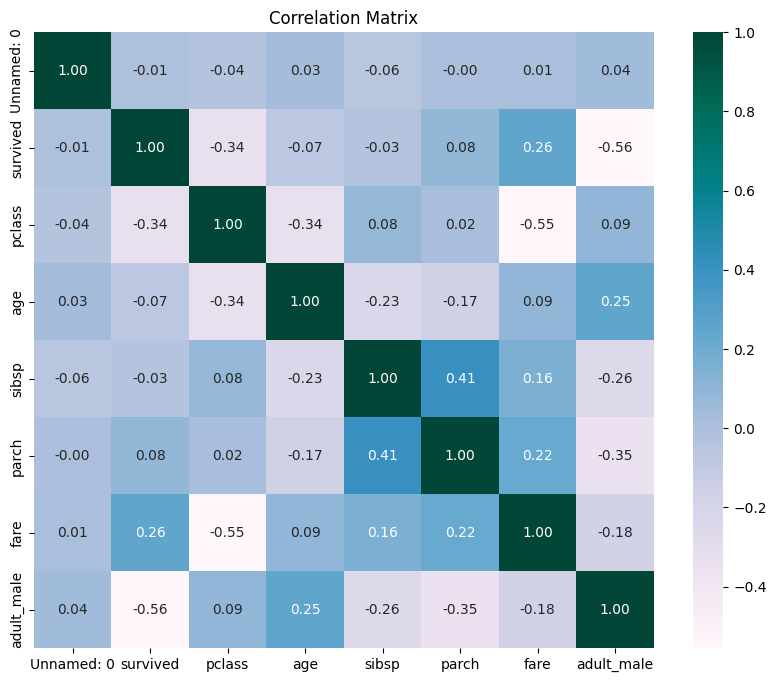

In [43]:
#correlation matrix - a table sowing correlation coefficients between variables

numerica_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerica_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##